In [ ]:
import pandas as pd

In [ ]:
! pip install -U --user scikit-learn

In [ ]:
import sklearn; sklearn.show_versions()


System:
    python: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\Ivan\anaconda3\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.2.2
          pip: 22.2.2
   setuptools: 63.4.1
        numpy: 1.21.5
        scipy: 1.9.1
       Cython: 0.29.32
       pandas: 1.5.3
   matplotlib: 3.5.2
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\Users\Ivan\anaconda3\Library\bin\mkl_rt.1.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2021.4-Product
    num_threads: 4
threading_layer: intel

       filepath: C:\Users\Ivan\anaconda3\Lib\site-packages\sklearn\.libs\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 8

       filepath: C:\Users\Ivan\anaconda3\Library\bin\libiomp5md.dll
         prefix: libiomp
       user_api: openmp
   internal_api: openm

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('train.csv', index_col=0)

In [ ]:
data

,user_id,ts,gate_id
0,18,2022-07-29 09:08:54,7
1,18,2022-07-29 09:09:54,9
2,18,2022-07-29 09:09:54,9
3,18,2022-07-29 09:10:06,5
4,18,2022-07-29 09:10:08,5
...,...,...,...
37513,6,2022-12-31 20:38:56,11
37514,6,2022-12-31 20:39:22,6
37515,6,2022-12-31 20:39:23,6
37516,6,2022-12-31 20:39:31,9


In [ ]:
data['ts'] = pd.to_datetime(data['ts'])

<AxesSubplot:>

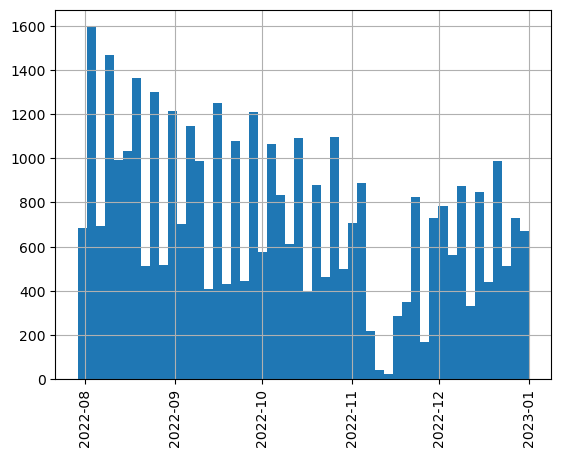

In [ ]:
plt.figure()
plt.xticks(rotation='vertical')
data['ts'].hist(bins=50)

Валидация с 2022-11-01 (включительно) по конец обучающей выборки.
Таргет - user_id. 
Оценка качества - процент правильных ответов (accuracy * 100).

In [ ]:
val_index = data['ts'] >= '2022-11-01'

In [ ]:
val_index

0        False
1        False
2        False
3        False
4        False
         ...  
37513     True
37514     True
37515     True
37516     True
37517     True
Name: ts, Length: 37518, dtype: bool

Q1. Постройте логистическую регрессию, оптимизатор liblinear, остальные параметры дефолтные, на 6 признаках: 
    ['gate_id', 'hour', 'min', 'day', 'month','dayofweek']. 
    
    Признаки делаем из "ts", в частности "min" - это минуты из времени.
  
Каково будет качество на обучающей выборке и на валидации (округлите до целых и выберите ближайший ответ). 10 баллов.

In [ ]:
data_gate_list = sorted(list(data['gate_id'].unique()))

In [ ]:
data_gate_list

# Нет 2

[-1, 0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [ ]:
# Val data

sorted(list(data.loc[val_index, 'gate_id'].unique()))

# По сравнению с train, в val нет user 0

[-1, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [ ]:
data['hour'] = data['ts'].dt.hour

In [ ]:
data['ts'].dt.hour

0         9
1         9
2         9
3         9
4         9
         ..
37513    20
37514    20
37515    20
37516    20
37517    20
Name: ts, Length: 37518, dtype: int64

In [ ]:
data['min'] = data['ts'].dt.minute

In [ ]:
data['day'] = data['ts'].dt.day

In [ ]:
data['month'] = data['ts'].dt.month

In [ ]:
data['dayofweek'] = data['ts'].dt.dayofweek

In [ ]:
data['dayofweek'].value_counts()

4    7899
3    7583
0    7277
2    7144
1    6670
5     660
6     285
Name: dayofweek, dtype: int64

# Val index

In [ ]:
# Сколько наблюдений в val? (True = 1, False = 0)

sum(val_index)

10684

In [ ]:
data.columns

Index(['user_id', 'ts', 'gate_id', 'hour', 'min', 'day', 'month', 'dayofweek'], dtype='object')

In [ ]:
data.columns[2:]

Index(['gate_id', 'hour', 'min', 'day', 'month', 'dayofweek'], dtype='object')

In [ ]:
X = data.loc[~val_index, data.columns[2:]]
y = data.loc[~val_index, 'user_id']

val = data.loc[val_index, data.columns[2:]]
y_val = data.loc[val_index, 'user_id']

In [ ]:
# Берем параметры скейлера по Х

scaler_X = StandardScaler()
scaler_X.fit(X)

X_scaled = scaler_X.transform(X)
val_scaled = scaler_X.transform(val)

In [ ]:
# Берем параметры скейлера по data

# scaler_data = StandardScaler()
# scaler_data.fit(data.loc[:, data.columns[2:]])

# X_scaled = scaler_data.transform(X)
# val_scaled = scaler_data.transform(val)

In [ ]:
print(X.columns, len(X.columns))

clf = LogisticRegression(random_state=1,solver='liblinear').fit(X_scaled, y)

preds = clf.predict(X_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y)):
    if pred == true:
        correct += 1
print('train',len(y),'correct',correct,'%',(100*correct)/len(y))

preds = clf.predict(val_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y_val)):
    if pred == true:
        correct += 1
print('val',len(y_val),'correct',correct,'%',(100*correct)/len(y_val))

Index(['gate_id', 'hour', 'min', 'day', 'month', 'dayofweek'], dtype='object') 6
train 26834 correct 2594 % 9.66684057538943
val 10684 correct 511 % 4.782852864095844


In [ ]:
# scaler data: 
# train 26834 correct 2599 % 9.6854736528285
# val 10684 correct 503 % 4.707974541370273

In [ ]:
# 10 и 5 

Q2: Постройте логистическую регрессию на дефолтных параметрах, но random_state=1, solver=saga, и 13 признаках:
['gate_id', 'hour', 'min', 'day', 'month', 'dayofweek','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'].
   
Отметьте все правильные ответы. 10 баллов.

In [ ]:
# Список дней недели

list_dow = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [ ]:
pd.get_dummies(data['ts'].dt.day_name())

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
37513,0,0,1,0,0,0,0
37514,0,0,1,0,0,0,0
37515,0,0,1,0,0,0,0
37516,0,0,1,0,0,0,0


In [ ]:
# Припишем новые бинарные переменные "день недели" к обучающей выборке

data[list_dow] = pd.get_dummies(data['ts'].dt.day_name())[list_dow]

In [ ]:
data['ts'].dt.day_name().value_counts()

Friday       7899
Thursday     7583
Monday       7277
Wednesday    7144
Tuesday      6670
Saturday      660
Sunday        285
Name: ts, dtype: int64

In [ ]:
data.columns

Index(['user_id', 'ts', 'gate_id', 'hour', 'min', 'day', 'month', 'dayofweek',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object')

In [ ]:
data.columns[2:]

Index(['gate_id', 'hour', 'min', 'day', 'month', 'dayofweek', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
      dtype='object')

In [ ]:
X = data.loc[~val_index, data.columns[2:]]
y = data.loc[~val_index, 'user_id']

val = data.loc[val_index, data.columns[2:]]
y_val = data.loc[val_index, 'user_id']

In [ ]:
scaler_X = StandardScaler()
scaler_X.fit(X)

X_scaled = scaler_X.transform(X)
val_scaled = scaler_X.transform(val)

# Обязательно нужно нормировать!

In [ ]:
print(X.columns, len(X.columns))

clf = LogisticRegression(random_state=1,solver='saga').fit(X_scaled, y)

preds = clf.predict(X_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y)):
    if pred == true:
        correct += 1
print('train',len(y),'correct',correct,'%',(100*correct)/len(y))

preds = clf.predict(val_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y_val)):
    if pred == true:
        correct += 1
print('val',len(y_val),'correct',correct,'%',(100*correct)/len(y_val))

Index(['gate_id', 'hour', 'min', 'day', 'month', 'dayofweek', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
      dtype='object') 13
train 26834 correct 2824 % 10.523962137586643
val 10684 correct 501 % 4.6892549606888805


1. 4.6 vs 4.7 Качество на валидации будет лучше, чем у регрессии в Q1 

false

In [ ]:
# Регрессия без признака 'Sunday' будет хуже на валидационной выборке

In [ ]:
data.columns[2:-1]

# Колонки без Sunday

Index(['gate_id', 'hour', 'min', 'day', 'month', 'dayofweek', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
      dtype='object')

In [ ]:
X = data.loc[~val_index, data.columns[2:-1]]
y = data.loc[~val_index, 'user_id']

val = data.loc[val_index, data.columns[2:-1]]
y_val = data.loc[val_index, 'user_id']

In [ ]:
scaler_X = StandardScaler()
scaler_X.fit(X)

X_scaled = scaler_X.transform(X)
val_scaled = scaler_X.transform(val)

# Обязательно нужно нормировать!

In [ ]:
print(X.columns, len(X.columns))

clf = LogisticRegression(random_state=1,solver='saga').fit(X_scaled, y)

preds = clf.predict(X_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y)):
    if pred == true:
        correct += 1
print('train',len(y),'correct',correct,'%',(100*correct)/len(y))

preds = clf.predict(val_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y_val)):
    if pred == true:
        correct += 1
print('val',len(y_val),'correct',correct,'%',(100*correct)/len(y_val))

Index(['gate_id', 'hour', 'min', 'day', 'month', 'dayofweek', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
      dtype='object') 12
train 26834 correct 2824 % 10.523962137586643
val 10684 correct 500 % 4.679895170348185


2. Регрессия без признака
'Sunday' будет хуже на
валидационной выборке

500 vs 501 => True

Что это значит? Это вообще нормально?

In [ ]:
# Adjust X.columns to 13 !!!

In [ ]:
# Регуляризация "elasticnet 0.5" хуже дефолтной

In [ ]:
data.columns[2:]

Index(['gate_id', 'hour', 'min', 'day', 'month', 'dayofweek', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
      dtype='object')

In [ ]:
X = data.loc[~val_index, data.columns[2:]]
y = data.loc[~val_index, 'user_id']

val = data.loc[val_index, data.columns[2:]]
y_val = data.loc[val_index, 'user_id']

In [ ]:
scaler_X = StandardScaler()
scaler_X.fit(X)

X_scaled = scaler_X.transform(X)
val_scaled = scaler_X.transform(val)

# Обязательно нужно нормировать!

In [ ]:
print(X.columns, len(X.columns))

clf = LogisticRegression(random_state=1,solver='saga',penalty='elasticnet', l1_ratio=0.5).fit(X_scaled, y)

preds = clf.predict(X_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y)):
    if pred == true:
        correct += 1
print('train',len(y),'correct',correct,'%',(100*correct)/len(y))

preds = clf.predict(val_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y_val)):
    if pred == true:
        correct += 1
print('val',len(y_val),'correct',correct,'%',(100*correct)/len(y_val))

Index(['gate_id', 'hour', 'min', 'day', 'month', 'dayofweek', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
      dtype='object') 13
train 26834 correct 2829 % 10.542595215025713
val 10684 correct 501 % 4.6892549606888805


3. Регуляризация "elasticnet 0.5"
хуже дефолтной

501 vs 501 => false

In [ ]:
# Регуляризация "l1" помогает при некоторых оптимизаторах

In [ ]:
print(X.columns, len(X.columns))

clf = LogisticRegression(random_state=1,solver='saga',penalty='l1').fit(X_scaled, y)

preds = clf.predict(X_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y)):
    if pred == true:
        correct += 1
print('train',len(y),'correct',correct,'%',(100*correct)/len(y))

preds = clf.predict(val_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y_val)):
    if pred == true:
        correct += 1
print('all',len(y_val),'correct',correct,'%',(100*correct)/len(y_val))

Index(['gate_id', 'hour', 'min', 'day', 'month', 'dayofweek', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
      dtype='object') 13
train 26834 correct 2828 % 10.5388685995379
all 10684 correct 495 % 4.6330962186447024


Q3.1 Регуляризация "l1" помогает
при некоторых оптимизаторах

liblinear 494
saga 495
vs
501

False

2. "Multinomial" подход не хуже,
а часто лучше "One-vs-rest"

True

multi_class
For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

In [ ]:
print(X.columns, len(X.columns))

clf = LogisticRegression(random_state=1,solver='saga',multi_class='ovr').fit(X_scaled, y)

preds = clf.predict(X_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y)):
    if pred == true:
        correct += 1
print('saga ovr \ntrain',len(y),'correct',correct,'%',(100*correct)/len(y))

preds = clf.predict(val_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y_val)):
    if pred == true:
        correct += 1
print('val',len(y_val),'correct',correct,'%',(100*correct)/len(y_val))

Index(['gate_id', 'hour', 'min', 'day', 'month', 'dayofweek', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
      dtype='object') 13
saga ovr 
train 26834 correct 2816 % 10.494149213684132
val 10684 correct 499 % 4.670535380007488


In [ ]:
print(X.columns, len(X.columns))

clf = LogisticRegression(random_state=1,solver='saga',multi_class='multinomial').fit(X_scaled, y)

preds = clf.predict(X_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y)):
    if pred == true:
        correct += 1
print('saga multinomial \ntrain',len(y),'correct',correct,'%',(100*correct)/len(y))

preds = clf.predict(val_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y_val)):
    if pred == true:
        correct += 1
print('val',len(y_val),'correct',correct,'%',(100*correct)/len(y_val))

Index(['gate_id', 'hour', 'min', 'day', 'month', 'dayofweek', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
      dtype='object') 13
saga multinomial 
train 26834 correct 2824 % 10.523962137586643
val 10684 correct 501 % 4.6892549606888805


TRUE
saga ovr
train 26834 correct 2816 % 10.494149213684132
val 10684 correct 499 % 4.670535380007488
vs
saga multinomial
train 26834 correct 2824 % 10.523962137586643
val 10684 correct 501 % 4.6892549606888805

TRUE
sag ovr 
train 26834 correct 2818 % 10.50160244465976
val 10684 correct 493 % 4.61437663796331
vs
sag multinomial 
train 26834 correct 2825 % 10.527688753074457
val 10684 correct 499 % 4.670535380007488

TRUE
lbfgs ovr
train 26834 correct 2818 % 10.50160244465976
val 10684 correct 493 % 4.61437663796331
vs
lbfgs multinomial
train 26834 correct 2829 % 10.542595215025713
val 10684 correct 501 % 4.6892549606888805

TRUE
newton-cg ovr
train 26834 correct 2818 % 10.50160244465976
val 10684 correct 493 % 4.61437663796331
vs
lbfgs multinomial
train 26834 correct 2825 % 10.527688753074457
val 10684 correct 498 % 4.661175589666792

3. Признак 'dayofweek' не улучшает качество модели

In [ ]:
data.columns[2:]

Index(['gate_id', 'hour', 'min', 'day', 'month', 'dayofweek', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
      dtype='object')

In [ ]:
# Убираем dayofweek

cols = ['gate_id', 'hour', 'min', 'day', 'month', 'Monday', \
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [ ]:
X = data.loc[~val_index, cols]
y = data.loc[~val_index, 'user_id']

val = data.loc[val_index, cols]
y_val = data.loc[val_index, 'user_id']

In [ ]:
scaler_X = StandardScaler()
scaler_X.fit(X)

X_scaled = scaler_X.transform(X)
val_scaled = scaler_X.transform(val)

# Обязательно нужно нормировать!

In [ ]:
print(X.columns, len(X.columns))

clf = LogisticRegression(random_state=1,solver='saga').fit(X_scaled, y)

preds = clf.predict(X_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y)):
    if pred == true:
        correct += 1
print('train',len(y),'correct',correct,'%',(100*correct)/len(y))

preds = clf.predict(val_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y_val)):
    if pred == true:
        correct += 1
print('val',len(y_val),'correct',correct,'%',(100*correct)/len(y_val))

Index(['gate_id', 'hour', 'min', 'day', 'month', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
      dtype='object') 12
train 26834 correct 2824 % 10.523962137586643
val 10684 correct 501 % 4.6892549606888805


saga 
train 26834 correct 2824 % 10.523962137586643
val 10684 correct 501 % 4.6892549606888805
vs no dow
train 26834 correct 2824 % 10.523962137586643
val 10684 correct 501 % 4.6892549606888805


lbfgs
train 26834 correct 2829 % 10.542595215025713
val 10684 correct 501 % 4.6892549606888805
vs no dow
train 26834 correct 2824 % 10.523962137586643
val 10684 correct 500 % 4.679895170348185

TRUE

       
Q4. Постройте логистическую регрессию на дефолтных параметрах и 33 признаках: 
    ['gate_-1', 'gate_0', 'gate_1', 
       'gate_3', 'gate_4', 'gate_5', 'gate_6', 'gate_7', 'gate_8', 'gate_9',
       'gate_10', 'gate_11', 'gate_12', 'gate_13', 'gate_14', 'gate_15',
       'gate_16', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'month_1', 'month_2', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'hour', 'min', 'day']. 
    
Отметьте все правильные ответы. 10 баллов.

В валидационной выборке больше 700 истинных предсказаний +
оптимизатор saga дает такое же качество как lbfgs -
user1 чаще всего приходит в четверг +

Q5. Для регрессии из Q4 с оптимизатором saga при random_state=1 отметьте все правильные ответы. 10 баллов. 

по сравнению с другими юзерами, user1 любит приходить в субботу и не любит приходить в воскресенье +
больше всего заходов предсказали у user55 +
среди всех предсказанных хуже всего предсказали user39, если оценивать по доле правильно предсказанных заходов - 

In [ ]:
data

,user_id,ts,gate_id,hour,min,day,month,dayofweek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,18,2022-07-29 09:08:54,7,9,8,29,7,4,0,0,0,0,1,0,0
1,18,2022-07-29 09:09:54,9,9,9,29,7,4,0,0,0,0,1,0,0
2,18,2022-07-29 09:09:54,9,9,9,29,7,4,0,0,0,0,1,0,0
3,18,2022-07-29 09:10:06,5,9,10,29,7,4,0,0,0,0,1,0,0
4,18,2022-07-29 09:10:08,5,9,10,29,7,4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37513,6,2022-12-31 20:38:56,11,20,38,31,12,5,0,0,0,0,0,1,0
37514,6,2022-12-31 20:39:22,6,20,39,31,12,5,0,0,0,0,0,1,0
37515,6,2022-12-31 20:39:23,6,20,39,31,12,5,0,0,0,0,0,1,0
37516,6,2022-12-31 20:39:31,9,20,39,31,12,5,0,0,0,0,0,1,0


In [ ]:
data['month'].value_counts().sort_index()

7       563
8     10639
9      8394
10     7238
11     4042
12     6642
Name: month, dtype: int64

In [ ]:
# Составим список турникетов вида "gate_номер"

list_gate_vars = ['gate_'+str(i) for i in data_gate_list]

In [ ]:
# Теперь: cделаем бинарные переменные

new_vals = pd.get_dummies(data['gate_id']) 

In [ ]:
new_vals

,-1,0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37513,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
37514,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
37515,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
37516,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Добавим бинарные переменные для турникетов

data[list_gate_vars] = new_vals

In [ ]:
# Список переменных вида "month_месяц в обучающей выборке"

list_months = ['month_'+str(i) for i in sorted(data['ts'].dt.month.unique())] 

In [ ]:
pd.get_dummies(data['ts'].dt.month)

,7,8,9,10,11,12
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
37513,0,0,0,0,0,1
37514,0,0,0,0,0,1
37515,0,0,0,0,0,1
37516,0,0,0,0,0,1


In [ ]:
# Добавим бинарные переменные для месяца

data[list_months] = pd.get_dummies(data['ts'].dt.month)

In [ ]:
data.columns

Index(['user_id', 'ts', 'gate_id', 'hour', 'min', 'day', 'month', 'dayofweek',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'gate_-1', 'gate_0', 'gate_1', 'gate_3', 'gate_4', 'gate_5',
       'gate_6', 'gate_7', 'gate_8', 'gate_9', 'gate_10', 'gate_11', 'gate_12',
       'gate_13', 'gate_14', 'gate_15', 'gate_16', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [ ]:
cols = ['gate_-1', 'gate_0', 'gate_1', 'gate_3', 'gate_4', 'gate_5', 'gate_6', 'gate_7', 
 'gate_8', 'gate_9', 'gate_10', 'gate_11', 'gate_12', 'gate_13', 'gate_14', 'gate_15', 
 'gate_16', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 
 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 
 'month_12', 'hour', 'min', 'day']

In [ ]:
X = data.loc[~val_index, cols]
y = data.loc[~val_index, 'user_id']

val = data.loc[val_index, cols]
y_val = data.loc[val_index, 'user_id']

In [ ]:
scaler_X = StandardScaler()
scaler_X.fit(X)

X_scaled = scaler_X.transform(X)
val_scaled = scaler_X.transform(val)

# Обязательно нужно нормировать!

In [ ]:
print(X.columns, len(X.columns))

clf = LogisticRegression(random_state=1,solver='saga').fit(X_scaled, y)

preds = clf.predict(X_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y)):
    if pred == true:
        correct += 1
print('train',len(y),'correct',correct,'%',(100*correct)/len(y))

preds = clf.predict(val_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y_val)):
    if pred == true:
        correct += 1
print('val',len(y_val),'correct',correct,'%',(100*correct)/len(y_val))

Index(['gate_-1', 'gate_0', 'gate_1', 'gate_3', 'gate_4', 'gate_5', 'gate_6',
       'gate_7', 'gate_8', 'gate_9', 'gate_10', 'gate_11', 'gate_12',
       'gate_13', 'gate_14', 'gate_15', 'gate_16', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'hour', 'min',
       'day'],
      dtype='object') 33
train 26834 correct 3878 % 14.451814861742566
val 10684 correct 787 % 7.366154998128042


В валидационной выборке больше 700 истинных предсказаний +
оптимизатор saga дает такое же качество как lbfgs -

lbfgs
all 26834 correct 3929 % 14.641872251621077
all 10684 correct 791 % 7.403594159490828
saga
all 26834 correct 3878 % 14.451814861742566
all 10684 correct 787 % 7.366154998128042

false

user1 чаще всего приходит в четверг +

In [ ]:
#user1 чаще всего приходит в четверг

val.loc[data['user_id']==1, ['Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].sum()

# true for val и data, false for train

Monday        79
Tuesday       87
Wednesday    103
Thursday     145
Friday        91
Saturday      52
Sunday         0
dtype: int64

Q5. Для регрессии из Q4 с оптимизатором saga при random_state=1 отметьте все правильные ответы. 10 баллов. 

по сравнению с другими юзерами, user1 любит приходить в субботу и не любит приходить в воскресенье +

In [ ]:
for user in range(58):
    for col, coef in zip(X.columns, clf.coef_[user,:]):
        print (user, col, coef)

0 gate_-1 -0.05306849895321151
0 gate_0 -0.010165988133327628
0 gate_1 -0.010158906915236701
0 gate_3 0.014453298514434875
0 gate_4 0.012600680571818733
0 gate_5 -0.013767707507823808
0 gate_6 0.28106699250836925
0 gate_7 -0.017258756894281854
0 gate_8 -0.05254302219571499
0 gate_9 0.1635006849141549
0 gate_10 -0.031703557529022514
0 gate_11 0.08332340100609352
0 gate_12 -0.27502296273257587
0 gate_13 -0.36064667947549844
0 gate_14 0.0
0 gate_15 -0.10599300511908281
0 gate_16 -0.010182829969246354
0 Monday 0.012546884902773609
0 Tuesday 0.000714574020514642
0 Wednesday 0.0571731643072373
0 Thursday 0.09226132740434795
0 Friday -0.09395328681630359
0 Saturday -0.19614264684843646
0 Sunday -0.11922793848890856
0 month_7 0.024288353762604388
0 month_8 0.05444999102753684
0 month_9 -0.12839048425358351
0 month_10 0.066267141660245
0 month_11 0.0
0 month_12 0.0
0 hour -0.44432198194393074
0 min -0.10254559993584124
0 day 0.14668237214547952
1 gate_-1 -0.04694544510713292
1 gate_0 -0.0088722

IndexError: index 47 is out of bounds for axis 0 with size 47

больше всего заходов предсказали у user55 +

In [ ]:
y_val

26834    1
26835    1
26836    1
26837    1
26838    1
        ..
37513    6
37514    6
37515    6
37516    6
37517    6
Name: user_id, Length: 10684, dtype: int64

In [ ]:
correct = 0
user_list = []

for i,(pred,true) in enumerate(zip(preds,y_val)):
    print(i,pred,true,end='')
    if pred == true:
        correct += 1
        print('     YES')
        user_list.append(i)
    else:
        print()
        pass

print('val',len(y_val),'correct',correct,'%',(100*correct)/len(y_val))

0 15 1
1 3 1
2 3 1
3 15 1
4 15 1
5 18 1
6 15 33
7 53 33
8 53 33
9 37 33
10 15 33
11 53 33
12 53 33
13 49 33
14 49 33
15 15 33
16 15 33
17 49 49     YES
18 37 33
19 49 49     YES
20 49 49     YES
21 15 49
22 15 49
23 37 49
24 53 11
25 53 11
26 37 11
27 53 32
28 53 32
29 15 0
30 53 0
31 53 0
32 15 0
33 15 0
34 49 0
35 49 0
36 15 0
37 15 0
38 15 48
39 15 15     YES
40 15 15     YES
41 37 15
42 53 48
43 53 48
44 37 48
45 15 35
46 53 35
47 53 35
48 53 50
49 53 50
50 37 35
51 37 50
52 15 39
53 49 39
54 49 39
55 15 39
56 15 39
57 37 39
58 15 54
59 53 54
60 53 54
61 37 54
62 15 6
63 49 6
64 49 6
65 15 6
66 15 6
67 37 6
68 15 19
69 53 19
70 53 19
71 37 19
72 47 38
73 53 38
74 53 38
75 37 38
76 37 6
77 12 0
78 47 0
79 15 50
80 47 0
81 15 50
82 37 6
83 12 48
84 12 54
85 15 48
86 15 48
87 15 54
88 15 54
89 53 54
90 53 54
91 37 54
92 12 49
93 15 49
94 15 49
95 12 1
96 15 1
97 15 1
98 37 12
99 37 1
100 53 12
101 53 12
102 37 48
103 15 1
104 15 1
105 37 12
106 37 1
107 53 48
108 53 48
109 37 0
110 37

8335 37 32
8336 47 29
8337 37 29
8338 37 29
8339 47 37
8340 47 37
8341 47 37
8342 27 37
8343 27 37
8344 47 33
8345 27 33
8346 27 33
8347 27 33
8348 27 33
8349 47 39
8350 27 43
8351 27 39
8352 27 43
8353 27 39
8354 27 43
8355 27 43
8356 47 35
8357 27 35
8358 27 35
8359 27 35
8360 27 35
8361 15 15     YES
8362 1 15
8363 1 15
8364 15 15     YES
8365 15 15     YES
8366 0 15
8367 15 3
8368 55 3
8369 55 3
8370 55 3
8371 15 23
8372 15 23
8373 15 17
8374 55 17
8375 55 17
8376 37 17
8377 55 55     YES
8378 55 55     YES
8379 37 55
8380 15 0
8381 12 0
8382 12 0
8383 15 0
8384 15 0
8385 37 0
8386 55 33
8387 55 33
8388 37 33
8389 15 19
8390 55 19
8391 55 19
8392 37 19
8393 15 19
8394 55 19
8395 55 19
8396 12 19
8397 12 19
8398 15 19
8399 15 19
8400 37 19
8401 15 35
8402 55 35
8403 15 35
8404 15 35
8405 15 35
8406 15 35
8407 37 35
8408 49 1
8409 15 55
8410 15 55
8411 15 55
8412 1 1     YES
8413 1 1     YES
8414 15 1
8415 15 1
8416 37 1
8417 15 55
8418 1 55
8419 1 55
8420 15 55
8421 15 55
8422 37 55

In [ ]:
pred_counts = y_val.iloc[user_list].value_counts()

pred_counts

# больше всего заходов предсказали у user55 +

55    246
37    162
12    120
15    117
49     35
1      35
19     24
3      16
33      8
26      6
24      5
46      4
32      3
18      2
39      2
0       2
Name: user_id, dtype: int64

In [ ]:
pred_counts.sum()

787

среди всех предсказанных хуже всего предсказали user39, если оценивать по доле правильно предсказанных заходов - 

In [ ]:
y_counts = y_val.value_counts()

true_counts = y_counts[pred_counts.index]

true_counts

55    796
37    613
12    519
15    459
49    427
1     557
19    375
3     286
33    487
26     83
24    191
46    179
32    430
18     37
39    405
0     456
Name: user_id, dtype: int64

среди всех предсказанных хуже всего предсказали user39, если оценивать по доле правильно предсказанных заходов - 
**почти

In [ ]:
(pred_counts / true_counts).sort_values()

0     0.004386
39    0.004938
32    0.006977
33    0.016427
46    0.022346
24    0.026178
18    0.054054
3     0.055944
1     0.062837
19    0.064000
26    0.072289
49    0.081967
12    0.231214
15    0.254902
37    0.264274
55    0.309045
Name: user_id, dtype: float64

Q6. Постройте логистическую регрессию на дефолтных параметрах и 50 признаках: 
    ['gate_-1', 'gate_0', 'gate_1', 
       'gate_3', 'gate_4', 'gate_5', 'gate_6', 'gate_7', 'gate_8', 'gate_9',
       'gate_10', 'gate_11', 'gate_12', 'gate_13', 'gate_14', 'gate_15',
       'gate_16', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 
       'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'min', 'day']. 

Самый точный оптимизатор-решатель (при max_iter=100, random_state=1). 10 баллов

lbfgs
liblinear 
newton-cg
newton-cholesky
sag
saga +
    


In [ ]:
# Список переменных вида "hour_час в обучающей выборке"

list_hours = ['hour_'+str(i) for i in sorted(data['ts'].dt.hour.unique())] 

In [ ]:
pd.get_dummies(data['ts'].dt.hour)

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37513,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
37514,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
37515,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
37516,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Добавим бинарные переменные для месяца

data[list_hours] = pd.get_dummies(data['ts'].dt.hour)

In [ ]:
# Q6

cols= ['gate_-1', 'gate_0', 'gate_1', 
       'gate_3', 'gate_4', 'gate_5', 'gate_6', 'gate_7', 'gate_8', 'gate_9',
       'gate_10', 'gate_11', 'gate_12', 'gate_13', 'gate_14', 'gate_15',
       'gate_16', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 
       'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'min', 'day']

In [ ]:
X = data.loc[~val_index, cols]
y = data.loc[~val_index, 'user_id']

val = data.loc[val_index, cols]
y_val = data.loc[val_index, 'user_id']

In [ ]:
scaler_X = StandardScaler()
scaler_X.fit(X)

X_scaled = scaler_X.transform(X)
val_scaled = scaler_X.transform(val)

# Обязательно нужно нормировать!

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
print(X.columns, len(X.columns))

for solver in tqdm(['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']):
    clf = LogisticRegression(random_state=1,solver=solver).fit(X_scaled, y)

    preds = clf.predict(X_scaled)
    correct = 0
    for i,(pred,true) in enumerate(zip(preds,y)):
        if pred == true:
            correct += 1
    print(solver,'train',len(y),'correct',correct,'%',(100*correct)/len(y))

    preds = clf.predict(val_scaled)
    correct = 0
    for i,(pred,true) in enumerate(zip(preds,y_val)):
        if pred == true:
            correct += 1
    print('val',len(y_val),'correct',correct,'%',(100*correct)/len(y_val))

Index(['gate_-1', 'gate_0', 'gate_1', 'gate_3', 'gate_4', 'gate_5', 'gate_6',
       'gate_7', 'gate_8', 'gate_9', 'gate_10', 'gate_11', 'gate_12',
       'gate_13', 'gate_14', 'gate_15', 'gate_16', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'min', 'day'],
      dtype='object') 50


  0%|          | 0/6 [00:00<?, ?it/s]

lbfgs train 26834 correct 4747 % 17.6902437206529
val 10684 correct 994 % 9.30363159865219
liblinear train 26834 correct 4726 % 17.61198479540881
val 10684 correct 1013 % 9.481467615125421
newton-cg train 26834 correct 4762 % 17.746142952970114
val 10684 correct 988 % 9.247472856608011
newton-cholesky train 26834 correct 4753 % 17.712603413579785
val 10684 correct 1008 % 9.43466866342194
sag train 26834 correct 4713 % 17.563538794067227
val 10684 correct 1016 % 9.50954698614751
saga train 26834 correct 4672 % 17.410747559066856
val 10684 correct 1019 % 9.5376263571696


Q7. Отметьте все правильные ответы для регрессии из Q6 и оптимизатора saga. 10 баллов

Регрессия переобучилась по сравнению с регрессией из Q4 -
random_state=2 лучше, чем random_state=1 для качества на обучающей выборке - 
Качество стало лучше, чем у регрессии в Q4 +

Регрессия переобучилась по сравнению с регрессией из Q4 False

Q4: 
train 26834 correct 3878 % 14.451814861742566
val 10684 correct 787 % 7.366154998128042

Качество стало лучше, чем у регрессии в Q4 True

In [ ]:
clf = LogisticRegression(random_state=2,solver='saga').fit(X_scaled, y)

preds = clf.predict(X_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y)):
    if pred == true:
        correct += 1
print(solver,'train',len(y),'correct',correct,'%',(100*correct)/len(y))

preds = clf.predict(val_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y_val)):
    if pred == true:
        correct += 1
print('val',len(y_val),'correct',correct,'%',(100*correct)/len(y_val))

saga train 26834 correct 4671 % 17.40702094357904
val 10684 correct 1019 % 9.5376263571696


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_val)*100

9.5376263571696

random_state=2 лучше, чем random_state=1 для качества на обучающей выборке False

Q8. Отметьте все правильные ответы для регрессии из Q6 и оптимизатора saga. 10 баллов

Качество будет лучше на обучающей выборке, если уменьшить параметр C до 0.6 - 
class_weight='balanced' улучшает качество на обучающей выборке -
max_iter=200 ухудшает качество на валидационной выборке - True
max_iter=80 ухудшает качество на обучающей выборке + False

In [ ]:
clf = LogisticRegression(random_state=1,solver='saga',C=0.6).fit(X_scaled, y)

preds = clf.predict(X_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y)):
    if pred == true:
        correct += 1
print('train',len(y),'correct',correct,'%',(100*correct)/len(y))

preds = clf.predict(val_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y_val)):
    if pred == true:
        correct += 1
print('val',len(y_val),'correct',correct,'%',(100*correct)/len(y_val))

train 26834 correct 4670 % 17.403294328091228
val 10684 correct 1019 % 9.5376263571696


saga train 26834 correct 4672 % 17.410747559066856
val 10684 correct 1019 % 9.5376263571696

Качество будет лучше на обучающей выборке, если уменьшить параметр C до 0.6 - 

In [ ]:
clf = LogisticRegression(random_state=1,solver='saga',class_weight='balanced').fit(X_scaled, y)

preds = clf.predict(X_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y)):
    if pred == true:
        correct += 1
print('train',len(y),'correct',correct,'%',(100*correct)/len(y))

preds = clf.predict(val_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y_val)):
    if pred == true:
        correct += 1
print('val',len(y_val),'correct',correct,'%',(100*correct)/len(y_val))

train 26834 correct 3298 % 12.290377878810464
val 10684 correct 798 % 7.469112691875702


class_weight='balanced' улучшает качество на _обучающей выборке_ **False

saga train 26834 correct 4672 % 17.410747559066856
val 10684 correct 1019 % 9.5376263571696

In [ ]:
clf = LogisticRegression(random_state=1,solver='saga',max_iter=200).fit(X_scaled, y)

preds = clf.predict(X_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y)):
    if pred == true:
        correct += 1
print('train',len(y),'correct',correct,'%',(100*correct)/len(y))

preds = clf.predict(val_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y_val)):
    if pred == true:
        correct += 1
print('val',len(y_val),'correct',correct,'%',(100*correct)/len(y_val))

train 26834 correct 4711 % 17.5560855630916
val 10684 correct 1016 % 9.50954698614751


max_iter=200 ухудшает качество на _валидационной выборке_ **True

saga train 26834 correct 4672 % 17.410747559066856
val 10684 correct 1019 % 9.5376263571696

In [ ]:
clf = LogisticRegression(random_state=1,solver='saga',max_iter=80).fit(X_scaled, y)

preds = clf.predict(X_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y)):
    if pred == true:
        correct += 1
print('train',len(y),'correct',correct,'%',(100*correct)/len(y))

preds = clf.predict(val_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y_val)):
    if pred == true:
        correct += 1
print('val',len(y_val),'correct',correct,'%',(100*correct)/len(y_val))

train 26834 correct 4673 % 17.41447417455467
val 10684 correct 1026 % 9.603144889554473


max_iter=80 ухудшает качество на обучающей выборке False

saga train 26834 correct 4672 % 17.410747559066856
val 10684 correct 1019 % 9.5376263571696

max_iter=200 ухудшает качество на валидационной выборке -
1016 vs 1019 True

max_iter=80 ухудшает качество на обучающей выборке + 
4673 vs 4672 False

Q9. Улучшится ли качество модели на валидационной выборке, если в качестве признаков использовать предыдущее наблюдение?
Оцените для регрессии из Q6 и оптимизатора saga (random_state = 1). 10 баллов

Да, т.к. есть зависимость от предыдущего наблюдения +
Нет, т.к. переобучилась
Нет, качество такое же
Не понятно


In [ ]:
cols= ['gate_-1', 'gate_0', 'gate_1', 
       'gate_3', 'gate_4', 'gate_5', 'gate_6', 'gate_7', 'gate_8', 'gate_9',
       'gate_10', 'gate_11', 'gate_12', 'gate_13', 'gate_14', 'gate_15',
       'gate_16', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 
       'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'min', 'day']

In [ ]:
data2 = data[cols].copy()

In [ ]:
data2

,gate_-1,gate_0,gate_1,gate_3,gate_4,gate_5,gate_6,gate_7,gate_8,gate_9,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,min,day
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,8,29
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,9,29
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,9,29
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,10,29
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,10,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,38,31
37514,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,39,31
37515,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,39,31
37516,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,39,31


In [ ]:
data2_shifted = data2.iloc[:-1,:].copy()

In [ ]:
data2_shifted.columns = [col+'_prev' for col in data2_shifted.columns]

In [ ]:
data2 = data2.iloc[1:,:]

In [ ]:
data2_shifted.index = data2_shifted.index + 1

In [ ]:
data2_shifted.head(2)

,gate_-1_prev,gate_0_prev,gate_1_prev,gate_3_prev,gate_4_prev,gate_5_prev,gate_6_prev,gate_7_prev,gate_8_prev,gate_9_prev,...,hour_16_prev,hour_17_prev,hour_18_prev,hour_19_prev,hour_20_prev,hour_21_prev,hour_22_prev,hour_23_prev,min_prev,day_prev
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,8,29
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,9,29


In [ ]:
data2.head(2)

,gate_-1,gate_0,gate_1,gate_3,gate_4,gate_5,gate_6,gate_7,gate_8,gate_9,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,min,day
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,9,29
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,9,29


In [ ]:
data2 = pd.concat([data2, data2_shifted], axis=1)

In [ ]:
data2

,gate_-1,gate_0,gate_1,gate_3,gate_4,gate_5,gate_6,gate_7,gate_8,gate_9,...,hour_16_prev,hour_17_prev,hour_18_prev,hour_19_prev,hour_20_prev,hour_21_prev,hour_22_prev,hour_23_prev,min_prev,day_prev
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,8,29
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,9,29
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,9,29
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,10,29
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37513,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,21,31
37514,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,38,31
37515,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,39,31
37516,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,39,31


In [ ]:
cols = list(data2.columns)

In [ ]:
data2 = data2.assign(user_id=data['user_id'].iloc[1:].values)

In [ ]:
data2['user_id']

1        18
2        18
3        18
4        18
5        18
         ..
37513     6
37514     6
37515     6
37516     6
37517     6
Name: user_id, Length: 37517, dtype: int64

In [ ]:
val_index2 = val_index[1:]

In [ ]:
val_index2

1        False
2        False
3        False
4        False
5        False
         ...  
37513     True
37514     True
37515     True
37516     True
37517     True
Name: ts, Length: 37517, dtype: bool

In [ ]:
X = data2.loc[~val_index2, cols]
y = data2.loc[~val_index2, 'user_id']

val = data2.loc[val_index2, cols]
y_val = data2.loc[val_index2, 'user_id']

In [ ]:
scaler_X = StandardScaler()
scaler_X.fit(X)

X_scaled = scaler_X.transform(X)
val_scaled = scaler_X.transform(val)

# Обязательно нужно нормировать!

In [ ]:
clf = LogisticRegression(random_state=1,solver='saga',max_iter=100).fit(X_scaled, y)

preds = clf.predict(X_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y)):
    if pred == true:
        correct += 1
print('all',len(y),'correct',correct,'%',(100*correct)/len(y))

preds = clf.predict(val_scaled)
correct = 0
for i,(pred,true) in enumerate(zip(preds,y_val)):
    if pred == true:
        correct += 1
print('all',len(y_val),'correct',correct,'%',(100*correct)/len(y_val))

all 26833 correct 5076 % 18.917005180188575
all 10684 correct 1127 % 10.548483713964806


saga train 26834 correct 4672 % 17.410747559066856
val 10684 correct 1019 % 9.5376263571696

Q9. Улучшится ли качество модели на валидационной выборке, если в качестве признаков использовать предыдущее наблюдение?
Оцените для регрессии из Q6 и оптимизатора saga (random_state = 1). 10 баллов

Да, т.к. есть зависимость от предыдущего наблюдения True
Нет, т.к. переобучилась  
Нет, качество такое же
Не понятно

Q10. Проверьте, помогает ли качеству регрессии из Q6 и оптимизатора saga больше данных, 
оцените разницу между 60%, 80% и 100% от train. 10 баллов

Помогает, и на обучающей и на валидации
Помогает 
Не помогает, т.к. получаем почти те же значения
Не понятно True

In [ ]:
cols= ['gate_-1', 'gate_0', 'gate_1', 
       'gate_3', 'gate_4', 'gate_5', 'gate_6', 'gate_7', 'gate_8', 'gate_9',
       'gate_10', 'gate_11', 'gate_12', 'gate_13', 'gate_14', 'gate_15',
       'gate_16', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 
       'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'min', 'day']

In [ ]:
data_3 = data.copy()
val_index_3 = data_3['ts'] >= '2022-11-01'

In [ ]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
print(X.columns, len(X.columns))

R = 1000

#print(R)

train_scores = []
val_scores = []

for frac in tqdm([.99,0.6,0.8]):
    for i in tqdm(range(3)):

        print('frac =',frac,'round',i)
        
        train_3 = data_3.loc[val_index_3 == False].copy()
        train_3 = train_3.sample(frac=frac, random_state=i+R)
        val_3 = data_3.loc[val_index_3]
        
#        print('X, val shapes', train_3.shape, val_3.shape)
        
        X = train_3[cols]
        y = train_3['user_id']

        val = val_3[cols]
        y_val = val_3['user_id']

        scaler_X = StandardScaler()
        scaler_X.fit(X)

        X_scaled = scaler_X.transform(X)
        val_scaled = scaler_X.transform(val)
                
        clf = LogisticRegression(random_state=i,solver='saga').fit(X_scaled, y)

        preds = clf.predict(X_scaled)
        correct = 0
        for i,(pred,true) in enumerate(zip(preds,y)):
            if pred == true:
                correct += 1
        print('train',len(y),'correct',correct,'%',(100*correct)/len(y))
        
        train_scores.append((100*correct)/len(y))
        
        preds = clf.predict(val_scaled)
        correct = 0
        for i,(pred,true) in enumerate(zip(preds,y_val)):
            if pred == true:
                correct += 1
        print('val',len(y_val),'correct',correct,'%',(100*correct)/len(y_val))
        
        val_scores.append((100*correct)/len(y_val))

Index(['gate_-1', 'gate_0', 'gate_1', 'gate_3', 'gate_4', 'gate_5', 'gate_6',
       'gate_7', 'gate_8', 'gate_9', 'gate_10', 'gate_11', 'gate_12',
       'gate_13', 'gate_14', 'gate_15', 'gate_16', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'min', 'day',
       'gate_-1_prev', 'gate_0_prev', 'gate_1_prev', 'gate_3_prev',
       'gate_4_prev', 'gate_5_prev', 'gate_6_prev', 'gate_7_prev',
       'gate_8_prev', 'gate_9_prev', 'gate_10_prev', 'gate_11_prev',
       'gate_12_prev', 'gate_13_prev', 'gate_14_prev', 'gate_15_prev',
       'gate_16_prev', 'Monday_prev', 'Tuesday_prev', 'Wednesday_prev',
       'Thursday_prev', 'Friday_prev', 'Saturday_prev', 'Sunday_

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

frac = 0.99 round 0
train 26566 correct 4669 % 17.575095987352256
val 10684 correct 1030 % 9.64058405091726
frac = 0.99 round 1
train 26566 correct 4643 % 17.47722653015132
val 10684 correct 1027 % 9.61250467989517
frac = 0.99 round 2
train 26566 correct 4656 % 17.526161258751788
val 10684 correct 1016 % 9.50954698614751


  0%|          | 0/3 [00:00<?, ?it/s]

frac = 0.6 round 0
train 16100 correct 2825 % 17.546583850931675
val 10684 correct 1007 % 9.425308873081242
frac = 0.6 round 1
train 16100 correct 2863 % 17.782608695652176
val 10684 correct 1024 % 9.584425308873081
frac = 0.6 round 2
train 16100 correct 2815 % 17.48447204968944
val 10684 correct 1023 % 9.575065518532385


  0%|          | 0/3 [00:00<?, ?it/s]

frac = 0.8 round 0
train 21467 correct 3736 % 17.403456468067265
val 10684 correct 1035 % 9.687383002620741
frac = 0.8 round 1
train 21467 correct 3687 % 17.17519914287045
val 10684 correct 1057 % 9.893298390116062
frac = 0.8 round 2
train 21467 correct 3716 % 17.310290212884894
val 10684 correct 1024 % 9.584425308873081


saga train 26834 correct 4672 % 17.410747559066856
val 10684 correct 1019 % 9.5376263571696

In [ ]:
train_scores = pd.DataFrame([train_scores[:3], train_scores[3:6], train_scores[6:]]).T

In [ ]:
val_scores = pd.DataFrame([val_scores[:3], val_scores[3:6], val_scores[6:]]).T

In [ ]:
train_scores.columns = ['99%','60%','80%']
val_scores.columns = ['99%','60%','80%']
train_scores = train_scores[['99%','80%','60%']]
val_scores = val_scores[['99%','80%','60%']]

<AxesSubplot:>

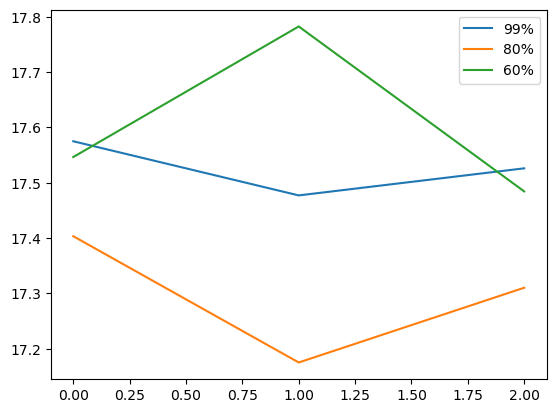

In [ ]:
train_scores.plot()

<AxesSubplot:>

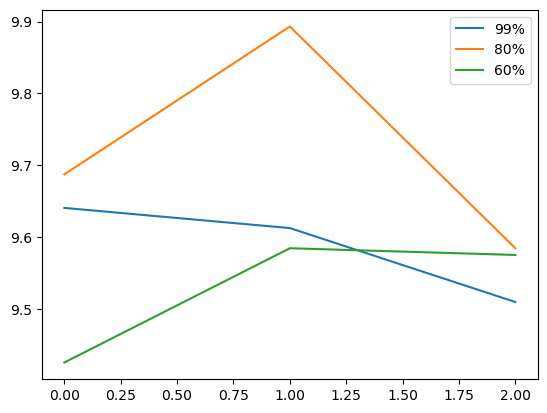

In [ ]:
val_scores.plot()

Q10. Проверьте, помогает ли качеству регрессии из Q6 и оптимизатора saga больше данных, 
оцените разницу между 60%, 80% и 100% от train. 10 баллов

Помогает, и на обучающей и на валидации
Помогает 
Не помогает, т.к. получаем почти те же значения
Не понятно True